<a href="https://colab.research.google.com/github/laloflogar/RB2026/blob/main/Ejemplo_Gr%C3%A1fica_Multipanel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd
from functools import reduce

# Configuración
token = '337db32f-2268-33f9-43e8-c853b84b6ee9'
# Define series_ids as a dictionary to correctly map IDs to names
series_ids = {
    '737261': "Manufacturas Desest",
    '737264': "Manufacturas Tenden",
    '737240': "Minería Desest",
    '737243': "Minería Tenden",
    '737254': "Construcción Desest",
    '737257': "Construcción Tenden",
    '737247': "Electricidad, agua y gas Desest",
    '737250': "Electricidad, agua y gas Tenden"

}

# Modify obtener_serie to accept and use the series_name for column renaming
def obtener_serie(serieID, token, serie_name):
    url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{serieID}/es/00/false/BIE-BISE/2.0/{token}?type=json'
    response = requests.get(url)

    if response.status_code == 200:
        content = json.loads(response.content)
        observations = content['Series'][0]['OBSERVATIONS']

        # Crear DataFrame temporal
        df = pd.DataFrame(observations)

        # Mantener solo fecha y valor, renombrando el valor con el nombre descriptivo
        df = df[['TIME_PERIOD', 'OBS_VALUE']].copy()
        df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')
        df.rename(columns={'OBS_VALUE': serie_name}, inplace=True) # Use descriptive name here

        return df
    else:
        print(f"Error al consultar la serie {serieID} ({serie_name}), código {response.status_code}")
        return None

# 1. Obtener todas las series en una lista
# Iterate over dictionary items to get both ID and name
lista_dataframes = [obtener_serie(id, token, name) for id, name in series_ids.items()]

# 2. Eliminar posibles errores (Nones) de la lista
lista_dataframes = [df for df in lista_dataframes if df is not None]

# 3. Unir todos los DataFrames por la columna 'TIME_PERIOD'
# Asegúrate de que lista_dataframes no esté vacío para evitar un error con reduce
if lista_dataframes:
    df_final = reduce(lambda left, right: pd.merge(left, right, on='TIME_PERIOD', how='outer'), lista_dataframes)
else:
    df_final = pd.DataFrame() # O maneja el caso de no datos de otra manera

# Ordenar por fecha para que tenga sentido cronológico
df_final = df_final.sort_values('TIME_PERIOD').reset_index(drop=True)

# Establecer TIME_PERIOD como index
df_final = df_final.set_index('TIME_PERIOD')

print(df_final)

             Manufacturas Desest  Manufacturas Tenden  Minería Desest  \
TIME_PERIOD                                                             
1993/01                56.770736            58.258806      103.826429   
1993/02                59.073122            58.547385      104.847827   
1993/03                59.777948            58.826880      106.027348   
1993/04                59.204189            59.040520      106.687071   
1993/05                58.828165            59.198934      106.179136   
...                          ...                  ...             ...   
2025/07               105.390256           106.049648       87.708050   
2025/08               105.466932           105.759046       88.001882   
2025/09               105.708304           105.670890       88.658186   
2025/10               105.479044           105.744862       89.296367   
2025/11               105.989954           105.938435       89.285633   

             Minería Tenden  Construcción Desest  

In [2]:
df_rebased = df_final.copy()

# Convert TIME_PERIOD index to datetime objects if it's not already
df_rebased.index = pd.to_datetime(df_rebased.index, format='%Y/%m')

# Filter for the year 2019 to get the base values
df_2019 = df_rebased[df_rebased.index.year == 2019]

# Calculate the average for 2019 for both series
base_value_desest1 = df_2019['Manufacturas Desest'].mean()
base_value_tenden1 = df_2019['Manufacturas Tenden'].mean()
base_value_desest2 = df_2019['Minería Desest'].mean()
base_value_tenden2 = df_2019['Minería Tenden'].mean()
base_value_desest3 = df_2019['Construcción Desest'].mean()
base_value_tenden3 = df_2019['Construcción Tenden'].mean()
base_value_desest4 = df_2019['Electricidad, agua y gas Desest'].mean()
base_value_tenden4 = df_2019['Electricidad, agua y gas Tenden'].mean()

# Rebase the series to 2019=100
df_rebased['Manufacturas Desest (2019=100)'] = (df_rebased['Manufacturas Desest'] / base_value_desest1) *100
df_rebased['Manufacturas Tenden (2019=100)'] = (df_rebased['Manufacturas Tenden'] / base_value_tenden1) *100
df_rebased['Minería Desest (2019=100)'] = (df_rebased['Minería Desest'] / base_value_desest2) *100
df_rebased['Minería Tenden (2019=100)'] = (df_rebased['Minería Tenden'] / base_value_tenden2) *100
df_rebased['Construcción Desest (2019=100)'] = (df_rebased['Construcción Desest'] / base_value_desest3) *100
df_rebased['Construcción Tenden (2019=100)'] = (df_rebased['Construcción Tenden'] / base_value_tenden3) *100
df_rebased['Electricidad, agua y gas Desest (2019=100)'] = (df_rebased['Electricidad, agua y gas Desest'] / base_value_desest4) *100
df_rebased['Electricidad, agua y gas Tenden (2019=100)'] = (df_rebased['Electricidad, agua y gas Tenden'] / base_value_tenden4) *100

# Display the head and tail of the new DataFrame with rebased columns
print("DataFrame con IGAE rebasado a 2019=100:")
display(df_rebased.head())
display(df_rebased.tail())

DataFrame con IGAE rebasado a 2019=100:


,Manufacturas Desest,Manufacturas Tenden,Minería Desest,Minería Tenden,Construcción Desest,Construcción Tenden,"Electricidad, agua y gas Desest","Electricidad, agua y gas Tenden",Manufacturas Desest (2019=100),Manufacturas Tenden (2019=100),Minería Desest (2019=100),Minería Tenden (2019=100),Construcción Desest (2019=100),Construcción Tenden (2019=100),"Electricidad, agua y gas Desest (2019=100)","Electricidad, agua y gas Tenden (2019=100)"
TIME_PERIOD,,,,,,,,,,,,,,,,
1993-01-01,56.770736,58.258806,103.826429,104.631209,68.086525,69.384602,32.320815,32.397862,56.782294,58.224051,109.626426,110.357088,70.792862,72.246408,34.140861,34.179297
1993-02-01,59.073122,58.547385,104.847827,105.131583,70.049339,69.587192,32.336994,32.350052,59.085148,58.512458,110.704881,110.884843,72.833695,72.457355,34.157950,34.128859
1993-03-01,59.777948,58.826880,106.027348,105.638498,70.195985,69.742317,32.150284,32.253843,59.790118,58.791786,111.950294,111.419500,72.986170,72.618878,33.960726,34.027359
1993-04-01,59.204189,59.040520,106.687071,106.109258,69.634600,69.799821,32.248782,32.122628,59.216242,59.005298,112.646870,111.916022,72.402470,72.678754,34.064772,33.888929
1993-05-01,58.828165,59.198934,106.179136,106.476315,70.683077,69.718582,32.138608,31.950471,58.840141,59.163618,112.110561,112.303165,73.492624,72.594164,33.948393,33.707305


,Manufacturas Desest,Manufacturas Tenden,Minería Desest,Minería Tenden,Construcción Desest,Construcción Tenden,"Electricidad, agua y gas Desest","Electricidad, agua y gas Tenden",Manufacturas Desest (2019=100),Manufacturas Tenden (2019=100),Minería Desest (2019=100),Minería Tenden (2019=100),Construcción Desest (2019=100),Construcción Tenden (2019=100),"Electricidad, agua y gas Desest (2019=100)","Electricidad, agua y gas Tenden (2019=100)"
TIME_PERIOD,,,,,,,,,,,,,,,,
2025-07-01,105.390256,106.049648,87.708050,87.251398,103.046958,102.179046,66.278110,66.596628,105.411711,105.986383,92.607635,92.026177,107.142920,106.393478,70.010355,70.258523
2025-08-01,105.466932,105.759046,88.001882,87.864121,101.055872,101.833825,67.021753,67.005795,105.488402,105.695954,92.917881,92.672431,105.072691,106.034018,70.795873,70.690188
2025-09-01,105.708304,105.670890,88.658186,88.435839,98.925594,101.947571,67.326042,67.509213,105.729823,105.607851,93.610848,93.275436,102.857738,106.152456,71.117297,71.221288
2025-10-01,105.479044,105.744862,89.296367,88.843194,102.993774,102.517110,68.397423,68.024406,105.500517,105.681778,94.284679,93.705082,107.087622,106.745486,72.249010,71.764809
2025-11-01,105.989954,105.938435,89.285633,89.095136,104.612238,103.439461,68.418823,68.493993,106.011531,105.875236,94.273346,93.970812,108.770418,107.705879,72.271615,72.260217


In [3]:
# Define la fecha de inicio para esta sección
fecha_inicio = '2018-01-01'

# Filtra el DataFrame df_rebased (de Gráfica 4) desde la fecha de inicio
base_filtrada = df_rebased[df_rebased.index >= fecha_inicio].copy()
display(base_filtrada.head())
display(base_filtrada.tail())

,Manufacturas Desest,Manufacturas Tenden,Minería Desest,Minería Tenden,Construcción Desest,Construcción Tenden,"Electricidad, agua y gas Desest","Electricidad, agua y gas Tenden",Manufacturas Desest (2019=100),Manufacturas Tenden (2019=100),Minería Desest (2019=100),Minería Tenden (2019=100),Construcción Desest (2019=100),Construcción Tenden (2019=100),"Electricidad, agua y gas Desest (2019=100)","Electricidad, agua y gas Tenden (2019=100)"
TIME_PERIOD,,,,,,,,,,,,,,,,
2018-01-01,98.513920,98.974316,104.923143,103.538481,101.111824,101.856040,100.353414,99.601399,98.533975,98.915271,110.784404,109.204560,105.130867,106.057150,106.004502,105.078101
2018-02-01,98.611113,99.045223,102.423728,103.318668,103.633611,101.634062,101.179256,100.051171,98.631188,98.986137,108.145366,108.972718,107.752891,105.826016,106.876849,105.552604
2018-03-01,100.169012,99.171059,102.260287,102.907586,101.345287,101.405124,98.130957,100.400421,100.189404,99.111898,107.972795,108.539140,105.373610,105.587635,103.656895,105.921058
2018-04-01,98.147890,99.424456,102.744288,102.319512,98.245069,101.127633,101.590344,100.672941,98.167870,99.365143,108.483834,107.918884,102.150163,105.298699,107.311087,106.208563
2018-05-01,100.265582,99.818889,102.750282,101.611185,101.807714,100.870640,97.272375,100.863758,100.285993,99.759341,108.490163,107.171794,105.854418,105.031106,102.749965,106.409872


,Manufacturas Desest,Manufacturas Tenden,Minería Desest,Minería Tenden,Construcción Desest,Construcción Tenden,"Electricidad, agua y gas Desest","Electricidad, agua y gas Tenden",Manufacturas Desest (2019=100),Manufacturas Tenden (2019=100),Minería Desest (2019=100),Minería Tenden (2019=100),Construcción Desest (2019=100),Construcción Tenden (2019=100),"Electricidad, agua y gas Desest (2019=100)","Electricidad, agua y gas Tenden (2019=100)"
TIME_PERIOD,,,,,,,,,,,,,,,,
2025-07-01,105.390256,106.049648,87.708050,87.251398,103.046958,102.179046,66.278110,66.596628,105.411711,105.986383,92.607635,92.026177,107.142920,106.393478,70.010355,70.258523
2025-08-01,105.466932,105.759046,88.001882,87.864121,101.055872,101.833825,67.021753,67.005795,105.488402,105.695954,92.917881,92.672431,105.072691,106.034018,70.795873,70.690188
2025-09-01,105.708304,105.670890,88.658186,88.435839,98.925594,101.947571,67.326042,67.509213,105.729823,105.607851,93.610848,93.275436,102.857738,106.152456,71.117297,71.221288
2025-10-01,105.479044,105.744862,89.296367,88.843194,102.993774,102.517110,68.397423,68.024406,105.500517,105.681778,94.284679,93.705082,107.087622,106.745486,72.249010,71.764809
2025-11-01,105.989954,105.938435,89.285633,89.095136,104.612238,103.439461,68.418823,68.493993,106.011531,105.875236,94.273346,93.970812,108.770418,107.705879,72.271615,72.260217


<Figure size 1400x1200 with 0 Axes>

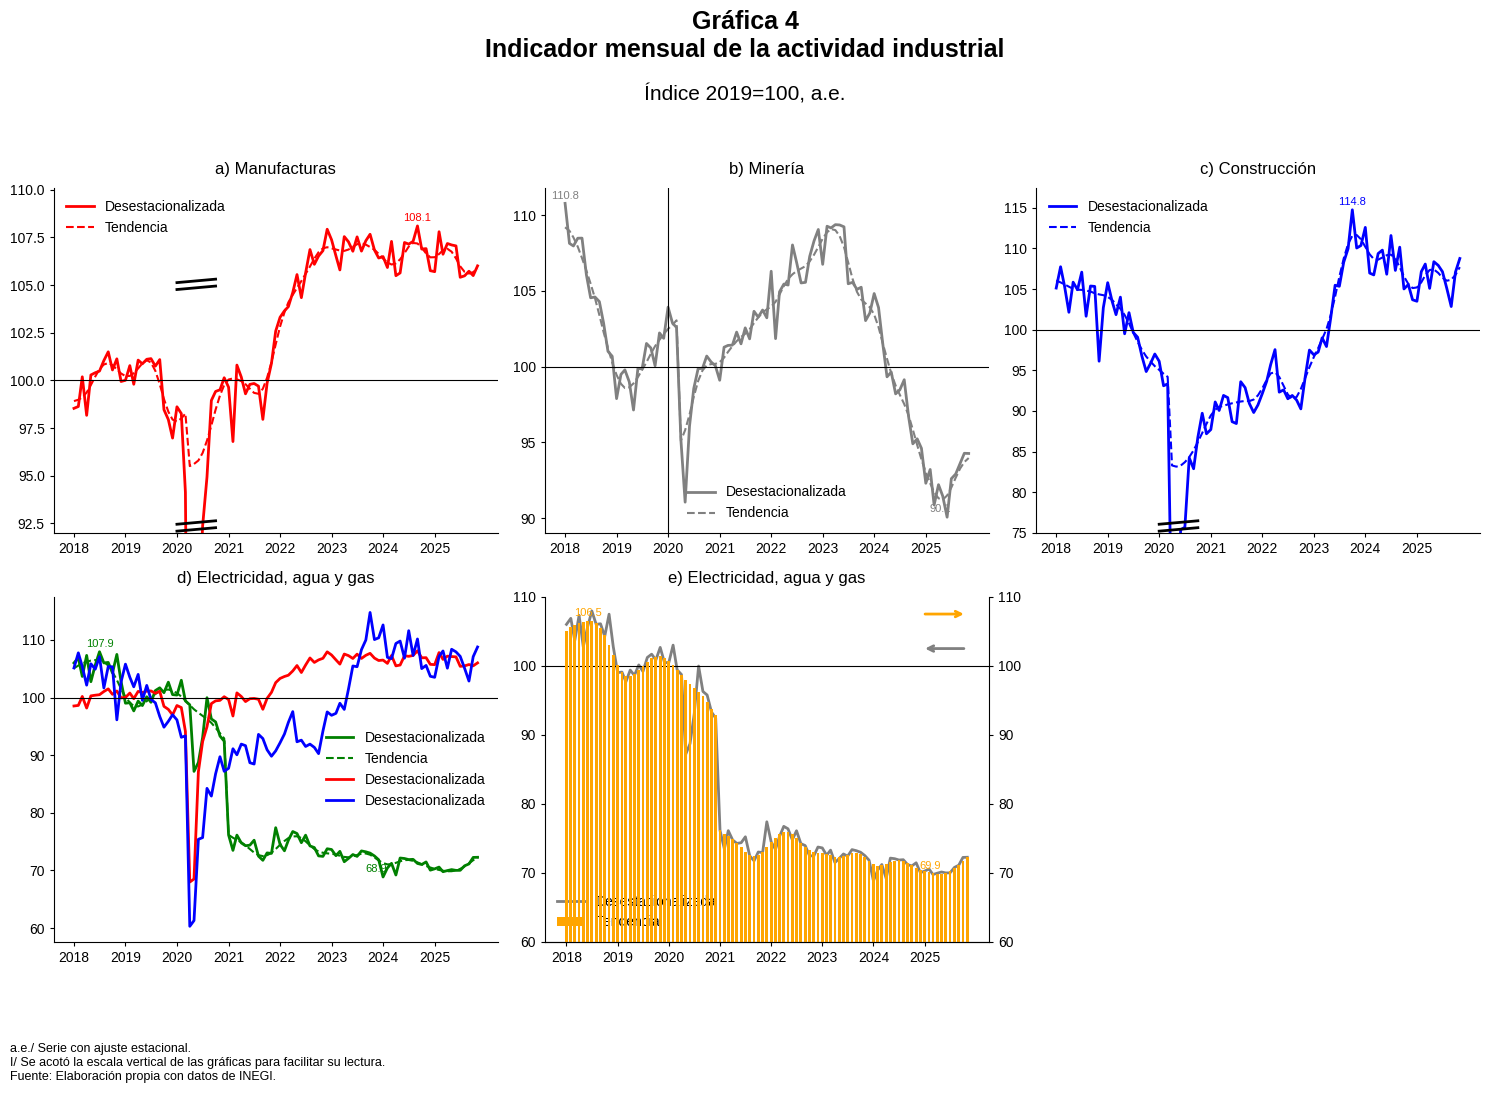

In [102]:
from matplotlib.typing import LineStyleType
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

# =================================================
# TIPOGRAFÍA
# =================================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False

# =================================================
# PREPARAR DATAFRAME
# =================================================
df_plot = base_filtrada.copy().sort_index()
# Keep index as datetime objects for consistent plotting with matplotlib
x = df_plot.index

# =================================================
# DISPOSICIÓN DEL GRÁFICO
# =================================================

fig = plt.figure(figsize=(14, 12)) # Ajusta el tamaño de la figura

# =================================================
# EJE X (ETIQUETAS ANUALES)
# =================================================
jan_x_ticks = [date for date in x if date.month == 1]
jan_x_labels = [str(date.year) for date in x if date.month == 1]

# =================================================
# DEFINICIÓN DE PANELES
# =================================================
panels = [
# Primer panel
    {
        "name": "Manufacturas",
        "title_prefix": "a)",
        "ylim": (92, None),
        "series": [
            {
                "col": "Manufacturas Desest (2019=100)",
                "label": "Desestacionalizada",
                "kind": "line",
                "style": {"color": "red", "linewidth": 2}
            },
            {
                "col": "Manufacturas Tenden (2019=100)",
                "label": "Tendencia",
                "kind": "line",
                "style": {"color": "red", "linestyle": "--"}
            }
        ],
        "brackets": [
            {
                "x_start": "2020-01",
                "length_frac": 0.10,
                "y_fracs": [(0.025, 0.035), (0.005, 0.015)]
            },
            {
                "x_start": "2020-01",
                "length_frac": 0.10,
                "y_fracs": [(0.725, 0.735), (0.705, 0.715)]
            }
        ],
        "annotations": {
            "min": {"series": 0, "dx": -5, "dy": 2},
            "max": {"series": 0, "dx": 0, "dy": 2}
        }
    },
# Segundo panel
    {
        "name": "Minería",
        "title_prefix": "b)",
        "ylim": (None, None),
        "series": [
            {
                "col": "Minería Desest (2019=100)",
                "label": "Desestacionalizada",
                "kind": "line",
                "style": {"color": "gray", "linewidth": 2}
            },
            {
                "col": "Minería Tenden (2019=100)",
                "label": "Tendencia",
                "kind": "line",
                "style": {"color": "gray", "linestyle": "--"}
            },

        ],
        "annotations": {
            "min": {"series": 0, "dx": -5, "dy": 2},
            "max": {"series": 0, "dx": 0, "dy": 2}
        }
    },
# Tercer panel
    {
        "name": "Construcción",
        "title_prefix": "c)",
        "ylim": (75, None),
        "series": [
            {
                "col": "Construcción Desest (2019=100)",
                "label": "Desestacionalizada",
                "kind": "line",
                "style": {"color": "blue", "linewidth": 2}
            },
            {
                "col": "Construcción Tenden (2019=100)",
                "label": "Tendencia",
                "kind": "line",
                "style": {"color": "blue", "linestyle": "--"}
            },
            {
                "col": "Alguna otra serie",
                "label": "Extra",
                "kind": "line",
                "style": {"color": "black", "linestyle": ":"}
            }
        ],
        "brackets": [
            {
                "x_start": "2020-01",
                "length_frac": 0.10,
                "y_fracs": [(0.025, 0.035), (0.005, 0.015)]
            }
        ],
        "annotations": {
            "min": {"series": 0, "dx": -5, "dy": 2},
            "max": {"series": 0, "dx": 0, "dy": 2}
        }
    },
# Cuarto panel
    {
        "name": "Electricidad, agua y gas",
        "title_prefix": "d)",
        "ylim": (None, None),
        "series": [
            {
                "col": "Electricidad, agua y gas Desest (2019=100)",
                "label": "Desestacionalizada",
                "kind": "line",
                "style": {"color": "green", "linewidth": 2}
            },
            {
                "col": "Electricidad, agua y gas Tenden (2019=100)",
                "label": "Tendencia",
                "kind": "line",
                "style": {"color": "green", "linestyle": "--"}
            },
            {
                "col": "Alguna otra serie",
                "label": "Extra",
                "kind": "line",
                "style": {"color": "black", "linestyle": ":"}
            },
            {
                "col": "Manufacturas Desest (2019=100)",
                "label": "Desestacionalizada",
                "kind": "line",
                "style": {"color": "red", "linewidth": 2}
            },
            {
                "col": "Construcción Desest (2019=100)",
                "label": "Desestacionalizada",
                "kind": "line",
                "style": {"color": "blue", "linewidth": 2}
            },
            {
                "col": "Alguna otra serie",
                "label": "Extra",
                "kind": "line",
                "style": {"color": "black", "linestyle": ":"}
            }
        ],
        "annotations": {
            "min": {"series": 0, "dx": -5, "dy": 2},
            "max": {"series": 0, "dx": 0, "dy": 2}
        }
    },
  # Quinto panel
    {
        "name": "Electricidad, agua y gas",
        "title_prefix": "e)",
        "ylim": (60, 110),
        "ylim_secondary": (60, 110), # Added option to modify secondary y-axis range
        "series": [
            {
                "col": "Electricidad, agua y gas Desest (2019=100)",
                "label": "Desestacionalizada",
                "kind": "line",
                "style": {"color": "gray", "linewidth": 2}
            },
            {
                "col": "Electricidad, agua y gas Tenden (2019=100)", # This series will go on twinx
                "label": "Tendencia",
                "kind": "bar",
                "style": {"color": "orange","width": 20},
                "axis": "secondary" # New key to indicate secondary axis
            },
            {
                "col": "Alguna otra serie",
                "label": "Extra",
                "kind": "line",
                "style": {"color": "black", "linestyle": ":"}
            }
        ],
        "annotations": {
            "min": {"series": 0, "dx": -5, "dy": 2},
            "max": {"series": 0, "dx": 0, "dy": 2}
        },
        "arrows": [
            {
                "color": "orange",
                "xy_frac": (0.95, 0.95), # Tip of the arrow (axes fraction: x, y)
                "xytext_frac": (0.85, 0.95), # Tail of the arrow (axes fraction: x, y)
                "arrowstyle": "->", # Matplotlib arrow style
                "linewidth": 2
            },
            {
                "color": "gray",
                "xy_frac": (0.85, 0.85), # Tip of the arrow (axes fraction: x, y)
                "xytext_frac": (0.95, 0.85), # Tail of the arrow (axes fraction: x, y)
                "arrowstyle": "->",
                "linewidth": 2
            }
        ]
    }

]

# =================================================
# GENERAR GRÁFICOS
# =================================================

#Grafica las series
def plot_series(ax, x, df, series_def, ax2=None):
    lines = []
    labels = []
    for s in series_def:
        current_ax = ax2 if s.get("axis") == "secondary" and ax2 is not None else ax
        if s["col"] in df.columns:
            if s["kind"] == "line":
                line, = current_ax.plot(x, df[s["col"]], **s["style"])
            elif s["kind"] == "bar":
                line = current_ax.bar(x, df[s["col"]], **s["style"])
            lines.append(line)
            labels.append(s["label"])
        else:
            print(f"Warning: Column '{s['col']}' not found in DataFrame. Skipping.")
    return lines, labels

#Grafica las marcas de acotación
def draw_brackets(ax, x, idx, br):
    ymin, ymax = ax.get_ylim()
    x0 = idx.get_loc(pd.to_datetime(br["x_start"]))
    x_start = idx[x0]
    x_end = x_start + pd.DateOffset(months=int(len(x) * br["length_frac"]))
    for y0f, y1f in br["y_fracs"]:
        ax.plot([x_start, x_end],
                [ymin + (ymax-ymin)*y0f, ymin + (ymax-ymin)*y1f],
                color="black", lw=2)


#Grafica las etiquetas de datos
def annotate_extreme(ax, x, df, series_def, annotation_config, extreme_type):
    series_index = annotation_config["series"]
    col_name = series_def[series_index]["col"]

    if col_name not in df.columns:
        print(f"Warning: Column '{col_name}' not found for annotation. Skipping.")
        return

    if extreme_type == "min":
        extreme_value = df[col_name].min()
        extreme_date_index = df[col_name].idxmin()
    elif extreme_type == "max":
        extreme_value = df[col_name].max()
        extreme_date_index = df[col_name].idxmax()
    else:
        return

    x_val = extreme_date_index
    y_val = extreme_value

    ax.annotate(f'{y_val:.1f}',
                xy=(x_val, y_val),
                xytext=(annotation_config["dx"], annotation_config["dy"]),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=8, color=series_def[series_index]["style"]["color"])

def draw_arrows(ax, arrows_config):
    for arrow in arrows_config:
        ax.annotate('', # No text
                    xy=arrow["xy_frac"], # Arrow tip position (axes fraction)
                    xytext=arrow["xytext_frac"], # Arrow tail position (axes fraction)
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(arrowstyle=arrow.get("arrowstyle", "->"),
                                    color=arrow["color"],
                                    lw=arrow.get("linewidth", 1)))


num_paneles = len(panels)
nrows = 2
ncols = int(np.ceil(num_paneles / nrows))

fig, all_axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

if ncols > 1 and nrows > 1:
    all_axes = all_axes.flatten()
elif nrows == 1 and ncols == 1:
    all_axes = [all_axes]
elif nrows == 1 or ncols == 1:
    all_axes = all_axes

fig.tight_layout(pad=3.0)

for i, panel in enumerate(panels):
    ax = all_axes[i]
    ax2 = None # Initialize secondary axis as None

    primary_series = []
    secondary_series = []

    for s in panel["series"]:
        if s.get("axis") == "secondary":
            secondary_series.append(s)
        else:
            primary_series.append(s)

    if any(s.get("col") == "Alguna otra serie" for s in primary_series):
        if "Alguna otra serie" not in df_plot.columns:
            primary_series = [s for s in primary_series if s.get("col") != "Alguna otra serie"]

    # Plot primary series
    lines1, labels1 = plot_series(ax, x, df_plot, primary_series)

    # Graficar eje secundario para un panel en particular
    if secondary_series:
        ax2 = ax.twinx()
        lines2, labels2 = plot_series(ax, x, df_plot, secondary_series, ax2=ax2)
        # Conditionally set ylabel to empty string for panel 'e'
        if panel['title_prefix'] == 'e)':
            ax2.set_ylabel('') # Removed ylabel for panel 'e' secondary axis
        else:
            ax2.set_ylabel(secondary_series[0]['label'] + ' (secundario)', color='black') # Set secondary y-axis label to black
        ax2.tick_params(axis='y', labelcolor='black') # Set secondary y-axis tick labels to black
        # Combine legends
        lines = lines1 + lines2
        labels = labels1 + labels2
    else:
        lines = lines1
        labels = labels1

    #Graficar línea horizontal
    ax.axhline(100, color="black", lw=0.8)
    ax.set_xticks(jan_x_ticks)
    ax.set_xticklabels(jan_x_labels, rotation=0, ha='center')

    #Graficar línea vertical para un solo panel
    if panel['title_prefix'] == 'b)':
        ax.axvline(pd.to_datetime("2020-01"), color="black", lw=0.8)

    if panel.get("ylim"):
        ymin, ymax = panel["ylim"]
        _, auto_max = ax.get_ylim()
        ax.set_ylim(ymin if ymin else ax.get_ylim()[0],
                    ymax if ymax else auto_max)

    # Set ylim for secondary axis if it exists and ylim is provided in panel
    if ax2 and panel.get("ylim_secondary"):
        ymin_sec, ymax_sec = panel["ylim_secondary"]
        _, auto_max_sec = ax2.get_ylim()
        ax2.set_ylim(ymin_sec if ymin_sec else ax2.get_ylim()[0],
                     ymax_sec if ymax_sec else auto_max_sec)

    if "brackets" in panel:
        for br in panel["brackets"]:
            draw_brackets(ax, x, df_plot.index, br)

    if "annotations" in panel:
        # Ensure to pass the correct series list for annotation based on which axis it belongs to
        if "min" in panel["annotations"]:
            # Determine which series list to use for annotation
            annotation_series_list = secondary_series if secondary_series and panel['annotations']['min']['series'] < len(secondary_series) else primary_series
            annotate_extreme(ax, x, df_plot, annotation_series_list,
                              panel["annotations"]["min"], "min")
        if "max" in panel["annotations"]:
            annotation_series_list = secondary_series if secondary_series and panel['annotations']['max']['series'] < len(secondary_series) else primary_series
            annotate_extreme(ax, x, df_plot, annotation_series_list,
                              panel["annotations"]["max"], "max")

    if "arrows" in panel:
        draw_arrows(ax, panel["arrows"])

    ax.set_title(f"{panel['title_prefix']} {panel['name']}", loc='center', pad=10)
    ax.legend(lines, labels, frameon=False) # Use combined lines and labels for legend
    ax.grid(True, linestyle=' ', alpha=0.6)

    # =================================================
    # ESTILO LIMPIO
    # =================================================

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(axis='x', length=3, labelbottom=True) # Marcas de graduación del eje "x"
    ax.grid(axis='y', linestyle='', alpha=0.7)

    # For the primary axis (ax)
    ax.spines['left'].set_visible(True) # Ensure primary left spine is visible
    ax.tick_params(axis='y', labelleft=True, length=3) # Ensure primary y-axis labels are visible

    if ax2: # If a secondary axis exists (for panel 'e')
        # For the primary axis (ax), its right spine should be hidden
        ax.spines['right'].set_visible(False)

        # For the secondary axis (ax2)
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(True) # Make its right spine visible
        ax2.spines['left'].set_visible(False) # Secondary axis does not need a left spine
        ax2.spines['bottom'].set_visible(True)
        ax2.tick_params(axis='y', labelright=True, length=3) # Ensure secondary y-axis labels are visible
        ax2.grid(axis='y', linestyle='', alpha=0.7)
    else: # If no secondary axis (for all other panels)
        ax.spines['right'].set_visible(False) # Hide the right spine for the primary axis


for j in range(i + 1, len(all_axes)):
    fig.delaxes(all_axes[j])

# =================================================
# TÍTULO DEL GRÁFICO
# =================================================

fig.suptitle('Gráfica 4\nIndicador mensual de la actividad industrial', ha='center', y=1.02, fontsize=18, fontweight='bold') # Use 'color' and 'fontweight'


# =================================================
# SUBTITULO DEL GRÁFICO
# =================================================

plt.figtext(
    0.5, 0.93,# Ajusta la posición del subtítulo
    'Índice 2019=100, a.e.',# Escriba el subtítulo
    ha='center',# Centra horizontalmente
    fontsize=15
)

# =================================================
# NOTA AL PIE
# =================================================

plt.figtext(
    0.01, -0.05, # Ajusta la posición de la nota al pie
    'a.e./ Serie con ajuste estacional.\n'
    'I/ Se acotó la escala vertical de las gráficas para facilitar su lectura.\n'
    'Fuente: Elaboración propia con datos de INEGI.',
    ha='left',
    fontsize=9
)
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjusted rect to have 4 values

plt.show()